## Environment Setup

In [1]:
from copy import deepcopy
from my_agent_utils import add_agent_id

from my_entries.likehood_agent import LikelihoodAgent, CountFeatureProvider
from recogym.evaluate_agent import plot_verify_agents, verify_agents
%matplotlib inline
import gym
import matplotlib.pyplot as plt

from recogym import env_1_args, Configuration

# Set style for pretty plots
plt.style.use('ggplot')

products = 10

offline_users = 1000
online_users = 1000

# You can overwrite environment arguments here:

env_1_args['random_seed'] = 42
env_1_args['num_products']= products
env_1_args['phi_var']=0.0
env_1_args['number_of_flips']=1

# env_1_args['sigma_mu_organic'] = 0.0
# env_1_args['sigma_omega']=0
# env_1_args['normalize_beta']=True

# Initialize the gym for the first time by calling .make() and .init_gym()

#---------------------------------------------
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [6, 3]

env_1_args['number_of_flips'] = 0
env_1_args['sigma_mu_organic'] = 0.0
env_1_args['sigma_omega'] = 1
env_1_args['random_seed'] = 42
env_1_args['num_products'] = products
env_1_args['K'] = 5
env_1_args['number_of_flips'] = 5
#---------------------------------------------

env = gym.make('reco-gym-v1')
env.init_gym(env_1_args)

env.reset()


/workspace/ML/reco-gym/recogym/envs/abstract.py:54: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


8. Define Likelihood Agent

In [2]:
from scipy.stats import beta

config = Configuration(env_1_args)

count_product_views_feature_provider = CountFeatureProvider(config)  # <----- CountFeatureProvider

likelihood_agent = LikelihoodAgent(count_product_views_feature_provider)

lh_log_data = deepcopy(env).generate_logs(offline_users)

likelihood_agent.train(lh_log_data)

bandits = lh_log_data[lh_log_data['z'] == 'bandit']
successes = bandits[bandits['c'] == 1].shape[0]
failures = bandits[bandits['c'] == 0].shape[0]

lh_agent_res = add_agent_id(
    'Likelihood',
    beta.ppf(0.025, successes + 1, failures + 1),
    beta.ppf(0.500, successes + 1, failures + 1),
    beta.ppf(0.975, successes + 1, failures + 1))

Organic Users: 0it [00:00, ?it/s]
Users:   0%|          | 0/1000 [00:00<?, ?it/s]

# ------------------------------------------------------------------------------------
#  GENERATE LOGS FOR AGENT None
# ------------------------------------------------------------------------------------


Users: 100%|██████████| 1000/1000 [00:13<00:00, 76.46it/s]



LikelihoodAgent train() num_products 10


In [3]:
#ALL LEN

len(lh_log_data)

102137

In [4]:
#BANDITS LEN
len(bandits)

17293

In [5]:
#SUCCESS
successes

241

In [6]:
#FAILURES
failures


17052

In [7]:
comb_result = verify_agents(
    env,
    number_of_users=online_users,
    agents={
        'Likelihood LogReg': likelihood_agent,
    }
)

Organic Users: 0it [00:00, ?it/s]
Users:   1%|          | 9/1000 [00:00<00:11, 87.43it/s]

# ------------------------------------------------------------------------------------
#  GENERATE LOGS FOR AGENT <my_entries.likehood_agent.LikelihoodAgent object at 0x134b16510>
# ------------------------------------------------------------------------------------


Users: 100%|██████████| 1000/1000 [00:15<00:00, 64.95it/s]


AttributeError: 'function' object has no attribute 'set_title'

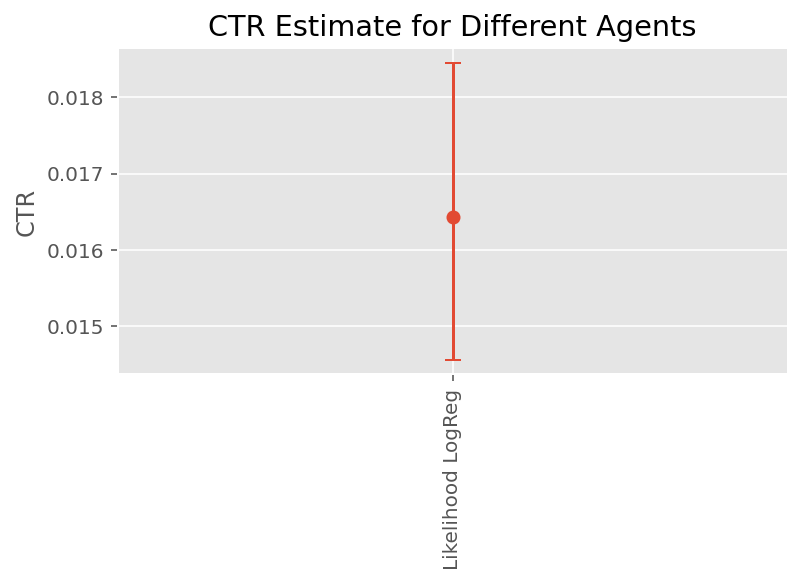

In [8]:
fig = plot_verify_agents(comb_result)
plt.ylabel('CTR')
plt.show()
